# Pima Indians Diabetes Dataset



# Assignment #1

* Done by: Hiba Nabeel zalloum  20227007
* supervised : Dr. Motaz Abu Sarah

In [1]:
# import Liabrary
import numpy as np #use for matrix
import pandas as pd #use for Dataframe 
import matplotlib.pyplot as plt #use for ploting and data visualization 
import seaborn as sns #Visualization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from scipy.stats import zscore
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

# Discribe and Analysis Data

In [2]:
df = pd.read_csv(r'C:\Users\User\Downloads\diabetes (2).csv')
df.head() # the first 5 rows from the data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


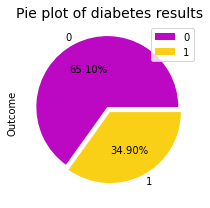

In [6]:
explode=(0.08,0)

df['Outcome'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(3,3),explode=explode,colors=['#bc08c2','#fad016'])
plt.title("Pie plot of diabetes results", fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

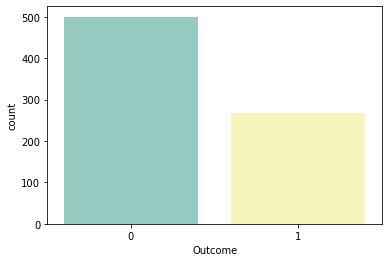

In [7]:
sns.countplot(x = "Outcome", data = df, palette="Set3")


# Data Normalization

In [8]:
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


# Buliding Models

* slipting X and Y for trainer data

In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### Logistic Regression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)

y_pred_lr = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred_lr))
model_score = model.score(X_train,y_train)
print(model_score)
model_score = model.score(X_test,y_test)
print(model_score)

              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81       151
         1.0       0.65      0.56      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

0.7653631284916201
0.7445887445887446


### KNeighbors Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(metrics.classification_report(y_test, y_pred_knn))
knn.score(X_test, y_test)

### Support Vector Machine 

In [ ]:
from sklearn import svm
svm = svm.SVC(gamma=0.025, C=4)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print(metrics.classification_report(y_test, y_pred_svm))
svm.score(X_test, y_test)

### Neural NetWork Model

In [ ]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

y_pred_NN = mlp.predict(X_test)
print(metrics.classification_report(y_test, y_pred_NN))

mlp.score(X_test, y_test)


### Code Summery 

In [ ]:
data = {"Model name": ["Logistic Regression","KNN","SVM", "NeuralNetwork"], "Accuracy(%)": ['74','71','76','76'], "Score": ['76.5','71.4','76.1','76.1']}
data_frame = pd.DataFrame(data)
data_frame

### Concluion

* Classification algorithms were used, because our data classifies a person's likelihood of developing diabetes. It carries through the (Outputs) a binary rating of 0 and 1.
* Most of the results were similar to what was reached by the researchers.
* Through CVM and neural networks, one result was reached